In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [20]:
df = pd.read_csv('fiat-punto2.csv', delimiter=';', encoding='cp1254')  #csv de ; ile ayrıldığı için delimiter ; kullandım.

In [21]:
df

,fiyat,model,yil,km,vites,yakit,renk,boyaDegisen
0,525000,Grande 1.4 Fire Active,2007,62000,Otomatik,Benzin,Kırmızı,"0 değişen, 0 boyalı"
1,595000,EVO 1.4 Dynamic,2012,115000,Düz,LPG & Benzin,Beyaz,8 boyalı
2,505000,Grande 1.4 Fire S&S,2011,50000,Düz,Benzin,Beyaz,"0 değişen, 0 boyalı"
3,475000,1.3 Multijet Pop,2013,150000,Düz,Dizel,Beyaz,"0 değişen, 0 boyalı"
4,407500,EVO 1.3 Multijet Dynamic,2011,275000,Düz,Dizel,Mavi,"2 değişen, 4 boyalı"
...,...,...,...,...,...,...,...,...
1330,554000,1.4 Popstar S&S,2017,88819,Düz,LPG & Benzin,Beyaz,"0 değişen, 0 boyalı"
1331,580000,1.4 Popstar S&S,2017,44000,Düz,Benzin,Beyaz,"0 değişen, 0 boyalı"
1332,560000,1.4 Popstar S&S,2017,47815,Düz,Benzin,Kırmızı,2 boyalı
1333,585000,1.4 Popstar S&S,2017,53900,Düz,Benzin,Kırmızı,"0 değişen, 0 boyalı"


In [22]:
unwanted_models = ['1.7 D', '1.3 JTD']
df = df[~df['model'].isin(unwanted_models)]
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) ##verilerin başındaki ve sonundaki boşlukları kaldırdım.

In [23]:
#df['fiyat'] = df['fiyat'].apply(lambda x: x/800000 )
#df['km'] = df['km'].apply(lambda x: x/400000 )

df["boya"]= df["boyaDegisen"]
df['boya'] = df['boya'].apply(lambda x: int(x.split(",")[1].split(" ")[1]) if  x!=None and type(x)!=int  and len(x)>15 else x)
df['boya'] = df['boya'].apply(lambda x: int(x.split(" ")[0]) if x!=None and type(x)!=int  and len(x)<15 and "boyalı" in x else x)

df["Degisen"]= df["boyaDegisen"]
df['Degisen'] = df['Degisen'].apply(lambda x: int(x.split(",")[0].split(" ")[0]) if type(x)!=int and x!=None and len(x)>15 else x)
df['Degisen'] = df['Degisen'].apply(lambda x: int(x.split(" ")[0]) if type(x)!=int and x!=None and len(x)<15 and "değişen" in x else x)
df['Degisen'] = df['Degisen'].apply(lambda x: 0 if type(x)!=int and x!=None and len(x)<15 and "boyalı" in x else x)


df['Degisen'] = df['Degisen'].apply(lambda x: int(x.split(",")[0].split(" ")[0]) if type(x)!=int and x!=None and len(x)>15 else x)

# Değişen Boya bilgisi bulunmayan yani girilmemiş araçların olduğu sütunlar boş olarak değerlendirildi ve mean ile dolduruldu
#mean_value=int(df['Degisen'].mean())
#mean_value2=int(df['boya'].mean())


#df["MotorHacmi"]=df["model"].apply(lambda x:x.split(" ")[0])
df["MotorHacmi"] = df["model"].apply(lambda x: '.'.join(filter(str.isdigit, x.split(".")[0] + "." + x.split(".")[1]))[:3] if len(x.split(".")) > 1 else None)
df["model"]=df["model"].apply(lambda x:x.split(" ")[-1])

#df['boya'].fillna(value=int(mean_value2), inplace=True)
#df['Degisen'].fillna(value=int(mean_value), inplace=True)

df=df.drop(["boyaDegisen"],axis=1)
df.head()

,fiyat,model,yil,km,vites,yakit,renk,boya,Degisen,MotorHacmi
0,525000,Active,2007,62000,Otomatik,Benzin,Kırmızı,0,0,1.4
1,595000,Dynamic,2012,115000,Düz,LPG & Benzin,Beyaz,8,0,1.4
2,505000,S&S,2011,50000,Düz,Benzin,Beyaz,0,0,1.4
3,475000,Pop,2013,150000,Düz,Dizel,Beyaz,0,0,1.3
4,407500,Dynamic,2011,275000,Düz,Dizel,Mavi,4,2,1.3


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

le=LabelEncoder()
df["vites"]=le.fit_transform(df["vites"])
df["yakit"]=le.fit_transform(df["yakit"])
df["model"]=le.fit_transform(df["model"])
df["renk"]=le.fit_transform(df["renk"])
df["MotorHacmi"]=le.fit_transform(df["MotorHacmi"])

df

,fiyat,model,yil,km,vites,yakit,renk,boya,Degisen,MotorHacmi
0,525000,0,2007,62000,1,0,9,0,0,2
1,595000,1,2012,115000,0,2,1,8,0,2
2,505000,10,2011,50000,0,0,1,0,0,2
3,475000,8,2013,150000,0,1,1,0,0,1
4,407500,1,2011,275000,0,1,11,4,2,1
...,...,...,...,...,...,...,...,...,...,...
1330,554000,10,2017,88819,0,2,1,0,0,2
1331,580000,10,2017,44000,0,0,1,0,0,2
1332,560000,10,2017,47815,0,0,9,2,0,2
1333,585000,10,2017,53900,0,0,9,0,0,2


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


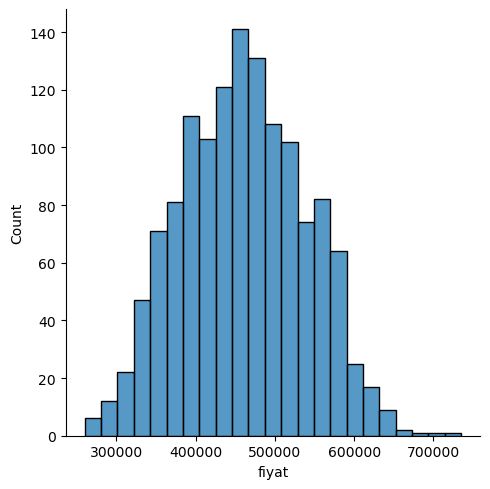

In [25]:
sbn.displot(df["fiyat"])

In [26]:
df.corr()

,fiyat,model,yil,km,vites,yakit,renk,boya,Degisen,MotorHacmi
fiyat,1.000000,0.384676,0.636487,-0.672355,0.175777,-0.128605,-0.115078,-0.319568,-0.208350,0.217987
model,0.384676,1.000000,0.686003,-0.309718,-0.043495,-0.146481,-0.297952,-0.154705,-0.060841,-0.115574
yil,0.636487,0.686003,1.000000,-0.434310,-0.095012,-0.135827,-0.330522,-0.183637,-0.066586,-0.052593
km,-0.672355,-0.309718,-0.434310,1.000000,-0.142251,0.228862,0.080450,0.259286,0.164399,-0.173152
vites,0.175777,-0.043495,-0.095012,-0.142251,1.000000,-0.037241,0.036224,0.014113,0.049162,0.121219
yakit,-0.128605,-0.146481,-0.135827,0.228862,-0.037241,1.000000,0.035494,0.073775,0.013873,0.176829
renk,-0.115078,-0.297952,-0.330522,0.080450,0.036224,0.035494,1.000000,0.084816,0.008227,0.176355
boya,-0.319568,-0.154705,-0.183637,0.259286,0.014113,0.073775,0.084816,1.000000,0.349387,0.019108
Degisen,-0.208350,-0.060841,-0.066586,0.164399,0.049162,0.013873,0.008227,0.349387,1.000000,0.022224
MotorHacmi,0.217987,-0.115574,-0.052593,-0.173152,0.121219,0.176829,0.176355,0.019108,0.022224,1.000000


<Axes: xlabel='fiyat', ylabel='km'>

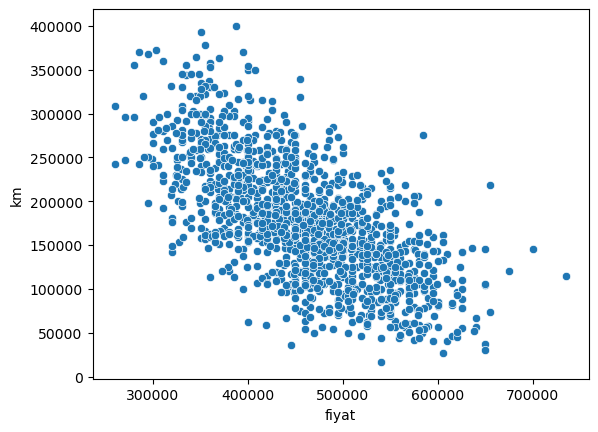

In [27]:
sbn.scatterplot(y="km",x="fiyat",data=df)

In [28]:
y=df["fiyat"].values
X=df.drop("fiyat",axis=1).values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

ModuleNotFoundError: No module named 'tensorflow'